<a href="https://colab.research.google.com/github/hemander1433/DATA-SCIENCE-ASSIGNEMNT/blob/main/sai_hemander_kambhampati_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLUSTERING TASK 3:**

In [6]:
import pandas as pd

# Load customer profile and transaction data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Check the first few rows of each dataset
print(customers_df.head())
print(transactions_df.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns



# Step 3: Merge datasets on common column (assuming 'CustomerID')

data = pd.merge(transactions, customers, on='CustomerID', how='inner')
print("\nMerged Data:")
print(data.head())




Merged Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price     CustomerName         Region  SignupDate  
0      300.68  300.68   Andrea Jenkins         Europe  2022-12-03  
1      300.68  300.68  Brittany Harvey           Asia  2024-09-04  
2      300.68  300.68  Kathryn Stevens         Europe  2024-04-04  
3      601.36  300.68  Travis Campbell  South America  2024-04-11  
4      902.04  300.68    Timothy Perez         Europe  2022-03-15  


In [13]:
# Step 2: Explore and preprocess data
print("Transactions Data Columns:")
print(transactions.columns)

print("\nCustomers Data Columns:")
print(customers.columns)

# Step 3: Merge datasets on common column (assuming 'CustomerID')
print("\nChecking for 'CustomerID' column in both datasets...")
print("'CustomerID' in transactions:", 'CustomerID' in transactions.columns)
print("'CustomerID' in customers:", 'CustomerID' in customers.columns)

# Debug column names
print("\nMerged Data Columns:")
print(data.columns)



Final Data for Clustering:
  CustomerID  total_spent  transaction_count        CustomerName  \
0      C0001      3354.52                  5    Lawrence Carroll   
1      C0002      1862.74                  4      Elizabeth Lutz   
2      C0003      2725.38                  4      Michael Rivera   
3      C0004      5354.88                  8  Kathleen Rodriguez   
4      C0005      2034.24                  3         Laura Weber   

          Region  SignupDate  
0  South America  2022-07-10  
1           Asia  2022-02-13  
2  South America  2024-03-07  
3  South America  2022-10-09  
4           Asia  2022-08-15  


In [14]:
# Step 4: Aggregate transaction information (e.g., total spend, transaction count)
aggregated_data = data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),  # Changed 'Amount' to 'TotalValue'
    transaction_count=('TransactionID', 'count')
).reset_index()

# Merge aggregated data with customer profile information
final_data = pd.merge(aggregated_data, customers, on='CustomerID')
print("\nFinal Data for Clustering:")
print(final_data.head())




Final Data for Clustering:
  CustomerID  total_spent  transaction_count        CustomerName  \
0      C0001      3354.52                  5    Lawrence Carroll   
1      C0002      1862.74                  4      Elizabeth Lutz   
2      C0003      2725.38                  4      Michael Rivera   
3      C0004      5354.88                  8  Kathleen Rodriguez   
4      C0005      2034.24                  3         Laura Weber   

          Region  SignupDate  
0  South America  2022-07-10  
1           Asia  2022-02-13  
2  South America  2024-03-07  
3  South America  2022-10-09  
4           Asia  2022-08-15  


In [15]:
# Step 5: Preprocess data for clustering
# Select relevant features for clustering
features = final_data.drop(columns=['CustomerID'])

# Handle categorical data if present (e.g., one-hot encoding)
features = pd.get_dummies(features, drop_first=True)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [16]:
# Step 6: Apply clustering algorithms
# Choose number of clusters between 2 and 10
clusters_range = range(2, 11)
cluster_metrics = {}


In [21]:
for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_features)

    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(scaled_features, labels)
    cluster_metrics[n_clusters] = db_index
    print(f"Number of clusters: {n_clusters}, DB index: {db_index:.4f}")

Number of clusters: 2, DB index: 0.9596
Number of clusters: 3, DB index: 0.9615
Number of clusters: 4, DB index: 0.9617
Number of clusters: 5, DB index: 4.8551
Number of clusters: 6, DB index: 4.1899
Number of clusters: 7, DB index: 1.4392
Number of clusters: 8, DB index: 1.6566
Number of clusters: 9, DB index: 1.8377
Number of clusters: 10, DB index: 1.7507


In [22]:
# Step 7: Choose the optimal number of clusters (lowest DB Index)
best_n_clusters = min(cluster_metrics, key=cluster_metrics.get)
print(f"\nOptimal number of clusters: {best_n_clusters}")

# Refit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
final_labels = kmeans.fit_predict(scaled_features)



Optimal number of clusters: 2


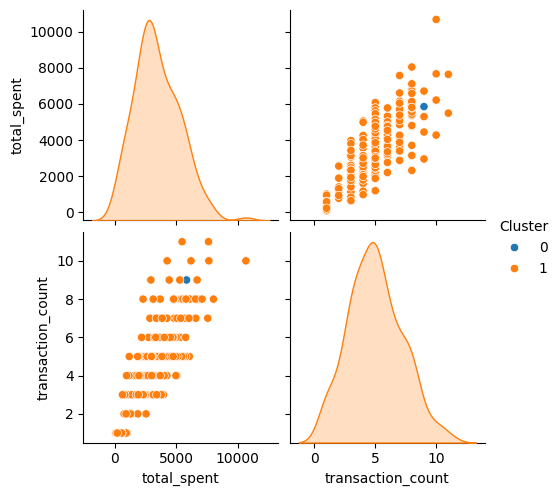

<ipython-input-23-9dc302a3dacd>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=final_data, palette='tab10')


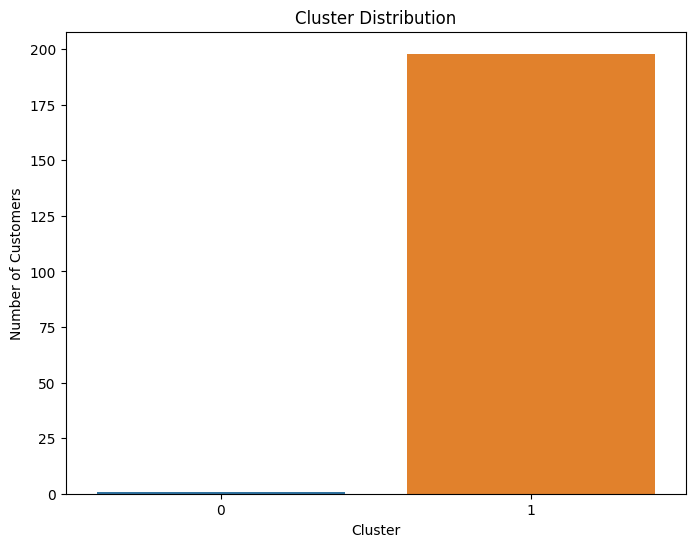

In [23]:
# Step 8: Visualize clusters
# Add labels to the original data for visualization
final_data['Cluster'] = final_labels

# Pairplot for numerical features
sns.pairplot(final_data, hue='Cluster', diag_kind='kde', palette='tab10')
plt.show()

# Cluster distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=final_data, palette='tab10')
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

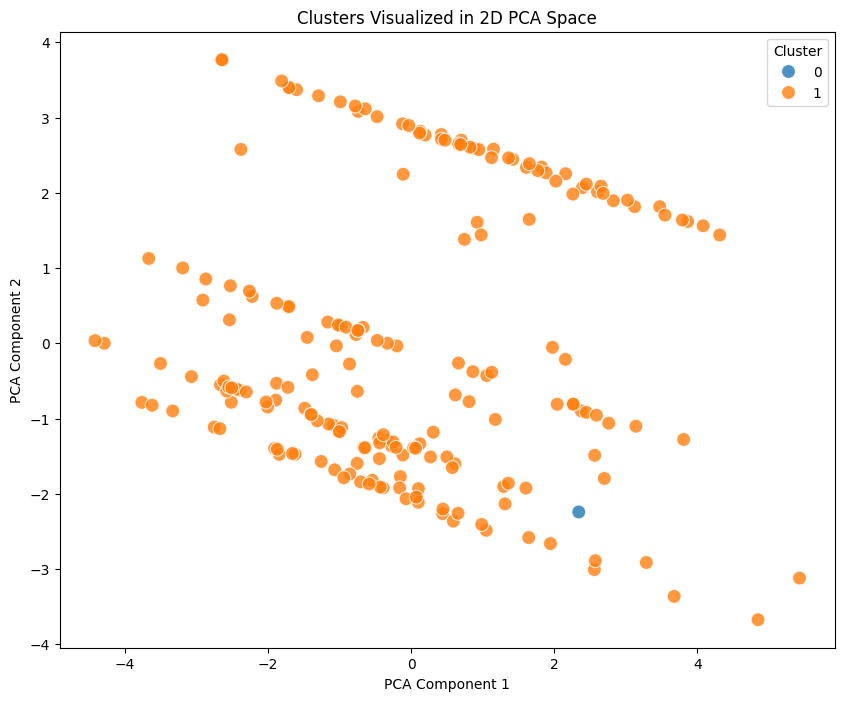

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=final_labels, palette='tab10', s=100, alpha=0.8)
plt.title("Clusters Visualized in 2D PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()
